In [1]:
#These lines set up inline plotting, and apply a standard size
%matplotlib inline
import matplotlib
matplotlib.rc('font', **{'size': 15})

In [40]:
import numpy as np
import time
from sklearn import svm
t = []
xr = range(11,40)
for i in xr:
    x = np.ones((i*10,10))
    y = np.arange(0,i*10)
    tic = time.time()
    clf = svm.SVR(kernel='linear', C=100)
    clf.fit(x,y)
    toc = time.time()
    t.append(toc-tic)

(110,)
(110, 10)
(120,)
(120, 10)
(130,)
(130, 10)
(140,)
(140, 10)
(150,)
(150, 10)
(160,)
(160, 10)
(170,)
(170, 10)
(180,)
(180, 10)
(190,)
(190, 10)
(200,)
(200, 10)
(210,)
(210, 10)
(220,)
(220, 10)
(230,)
(230, 10)
(240,)
(240, 10)
(250,)
(250, 10)
(260,)
(260, 10)
(270,)
(270, 10)
(280,)
(280, 10)
(290,)
(290, 10)
(300,)
(300, 10)
(310,)
(310, 10)
(320,)
(320, 10)
(330,)
(330, 10)
(340,)
(340, 10)
(350,)
(350, 10)
(360,)
(360, 10)
(370,)
(370, 10)
(380,)
(380, 10)
(390,)
(390, 10)


131.68736461


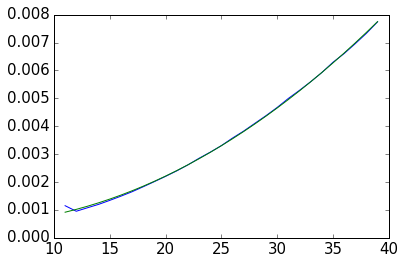

In [43]:
import matplotlib.pyplot as plt
plt.plot(xr,t)
p = np.polyfit(xr,t,2)
y = np.polyval(p,xr)

plt.plot(xr,y)
print(np.polyval(p,5000))